# COVID 19 Analysis



In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt     

In [3]:
#reading the files
demographic_data = pd.read_csv("C:\\Users\\Leehee\\repos\\Covid-19\\files\\covid19_line_list_data.csv")
prevalence_data = pd.read_csv("C:\\Users\\Leehee\\repos\\Covid-19\\files\\covid_19_data.csv")
patient_info = pd.read_csv("C:\\Users\\Leehee\\repos\\Covid-19\\files\\PatientInfo.csv")
moh_data = pd.read_csv("C:\\Users\\Leehee\\repos\\Covid-19\\files\\covid19-data-israel-20042020.csv")


In [4]:
demographic_data.head()
prevalence_data.head()
patient_info.head()


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [5]:
#calculate the percentage of null values in each column
percent_missing_dd = demographic_data.isna().mean().round(2) * 100
percent_missing_prd = prevalence_data.isna().mean().round(2) * 100
percent_missing_pi = patient_info.isna().mean().round(2) * 100

print(percent_missing_dd, percent_missing_prd, percent_missing_pi) 


id                         0.0
case_in_country           18.0
reporting date             0.0
Unnamed: 3               100.0
summary                    0.0
location                   0.0
country                    0.0
gender                    17.0
age                       22.0
symptom_onset             48.0
If_onset_approximated     48.0
hosp_visit_date           53.0
exposure_start            88.0
exposure_end              69.0
visiting Wuhan             0.0
from Wuhan                 0.0
death                      0.0
recovered                  0.0
symptom                   75.0
source                     0.0
link                       0.0
Unnamed: 21              100.0
Unnamed: 22              100.0
Unnamed: 23              100.0
Unnamed: 24              100.0
Unnamed: 25              100.0
Unnamed: 26              100.0
dtype: float64 SNo                 0.0
ObservationDate     0.0
Province/State     45.0
Country/Region      0.0
Last Update         0.0
Confirmed           0.0
Deat

In [6]:
#drop unnecessary columns or columns with missing data
dd = demographic_data.drop(['Unnamed: 3', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23' , 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'], axis=1)
prd = prevalence_data.copy()
pi = patient_info.drop(['disease', 'infection_order', 'contact_number', 'symptom_onset_date', 'released_date', 'deceased_date'], axis=1)

In [7]:
#replace nan values to 'Unknown'
dd['symptom_onset'] = dd['symptom_onset'].fillna('Unknown')
prd['Province/State'] = prd['Province/State'].fillna('Unknown')
pi['infection_case'] = pi['infection_case'].fillna('Unknown')

In [8]:
prd.info()
#change columns that represent number of people to int instead of float
prd[["Confirmed", "Deaths", "Recovered"]] = prd[["Confirmed", "Deaths", "Recovered"]].astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9117 entries, 0 to 9116
Data columns (total 8 columns):
SNo                9117 non-null int64
ObservationDate    9117 non-null object
Province/State     9117 non-null object
Country/Region     9117 non-null object
Last Update        9117 non-null object
Confirmed          9117 non-null float64
Deaths             9117 non-null float64
Recovered          9117 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 569.9+ KB


In [9]:
#create a new column for each observation- active cases
prd['Active'] = prd['Confirmed'] - prd['Recovered'] - prd['Deaths']
prd.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0,1
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0,14
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0,6
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0,1
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0,0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0,26
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2,0,0,2
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1,0,0,1
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4,0,0,4
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1,0,0,1


In [10]:
#Create a new dataframe, based on the updated observations. The data was last updated on March 26th.
prd_updated = prd[prd['ObservationDate'] == max(prd['ObservationDate'])].reset_index()

#get most updated data globally
updated_world_status = prd_updated.groupby('ObservationDate')[["Confirmed", "Deaths", "Recovered", "Active"]].sum()


## Ploting the cases

C:\Users\Leehee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'World COVID-19 Status - 26/3/20')

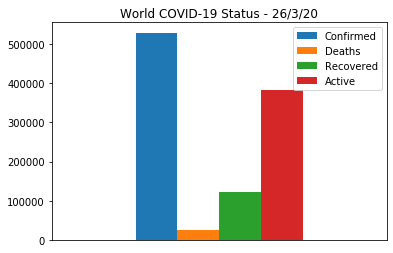

In [11]:
updated_world_status.plot(kind='bar')
x_axis = plt.axes().axes.get_xaxis()
x_axis.set_visible(False)
plt.xticks([], [])
plt.title('World COVID-19 Status - 26/3/20')







In [12]:
updated_world_status.style.highlight_max(color='orange')

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
03/26/2020,529591,23970,122150,383471


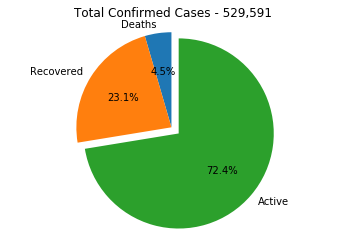

In [13]:
#pie plot
labels = ['Deaths', 'Recovered', 'Active']
sizes = [23907, 122150, 383471]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0, 0, 0.1), labels=labels, autopct='%1.1f%%',
         shadow=False, startangle=90)
ax1.axis('equal')
plt.title('Total Confirmed Cases - 529,591 ')
plt.show()

## Patient Info Analysis

The patient info data set contains 2,243 patients, mainly (over 99%) from Korea, and 56% females.


In [14]:
pi.shape
pi['country'].value_counts(normalize=True, dropna=False) * 100
pi['sex'].value_counts(normalize=True) * 100
pi['infection_case'].value_counts(normalize=True) * 100

Unknown                             46.812305
contact with patient                24.074900
etc                                  9.986625
Guro-gu Call Center                  4.814980
Shincheonji Church                   3.878734
overseas inflow                      3.120820
Onchun Church                        1.471244
gym facility in Cheonan              1.337494
Ministry of Oceans and Fisheries     1.203745
Cheongdo Daenam Hospital             0.936246
Dongan Church                        0.757914
Eunpyeong St. Mary's Hospital        0.624164
Seongdong-gu APT                     0.579581
gym facility in Sejong               0.178333
Suyeong-gu Kindergarten              0.133749
River of Grace Community Church      0.044583
Pilgrimage to Israel                 0.044583
Name: infection_case, dtype: float64

In [15]:
#convert 'age' column to numeric 
pi['age'] = pi['age'].str[:-1].astype(float)

#complete missing ages
current_year = dt.datetime.now().year
cal_age = (current_year - pi['birth_year']) 
pi['age_all'] = pi['age'].fillna(cal_age)



In [16]:
#convert new age column to deacades

def group_ages(val):
    if val >= 100:
        return '100s'
    elif val >= 90 and val < 100:
        return'90s'
    elif val >= 80 and val < 90:
        return '80s'
    elif val >= 70 and val < 80:
        return '70s'
    elif val >= 60 and val < 70:
        return '60s'
    elif val >= 50 and val < 60:
        return '50s'
    elif val >= 40 and val < 50:
        return '40s'
    elif val >= 30 and val < 40:
        return '30s'
    elif val >= 20 and val < 30:
        return '20s'
    elif val >= 10 and val < 20:
        return '10s'
    elif val >= 0 and val < 10:
        return '0s'
    else:
        return(val)
            

pi['age_all'] = pi['age_all'].apply(group_ages)


Text(0.5, 1.0, 'Age Distribution by Gender in Korea, n = 2,095')

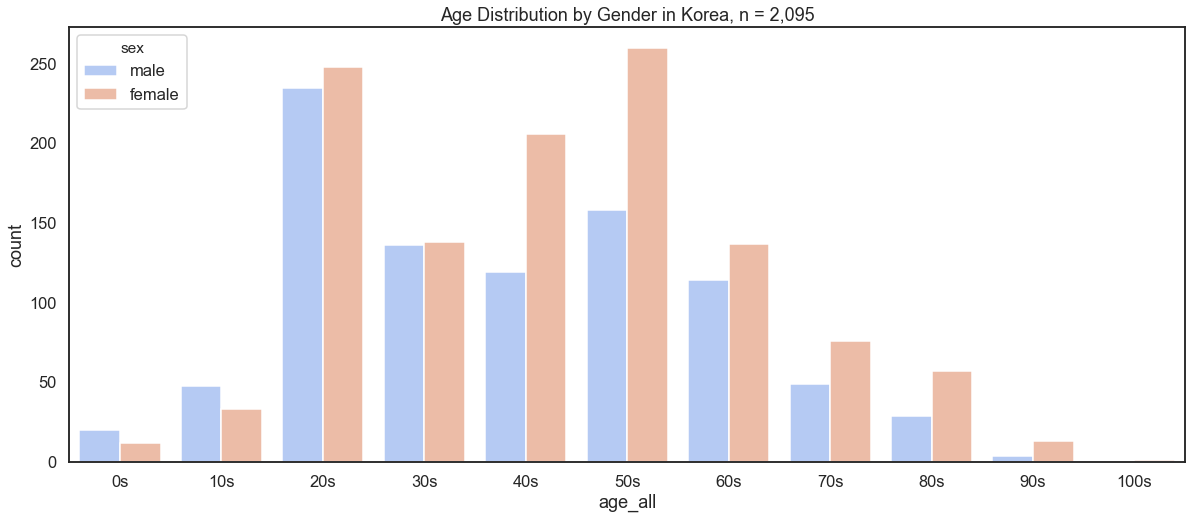

In [17]:
#Plot age distribution
sns.set(style="white", context="talk")
order=['0s','10s', '20s','30s','40s', '50s','60s','70s','80s','90s','100s']
plt.figure(figsize =(20,8)) 
age_plot = sns.countplot(data=pi, x='age_all' ,hue = 'sex', order=order,palette ='coolwarm')
plt.title('Age Distribution by Gender in Korea, n = 2,095')


## Analysis by Country

### Top 20 countries with highest prevalence of confirmed cases

In [18]:
country_prevalence = prd.groupby('Country/Region')[['Confirmed','Active','Deaths']].agg(np.sum)
#country_prevalence.reset_index(inplace=True)
country_prevalence.sort_values(by=['Confirmed'], ascending=False).head(20)


,Confirmed,Active,Deaths
Country/Region,,,
Mainland China,3769052,1633908,129147
Italy,726899,584914,62574
US,373452,365996,5278
Spain,339589,288255,20460
Iran,335415,205161,21181
Germany,279403,263777,1148
South Korea,209178,177732,1927
France,199953,175185,7856
Switzerland,80777,79032,979


### Top 20 countries with highest Death rates


In [19]:
country_prevalence['Death_rate, %'] = round((country_prevalence['Deaths'] / country_prevalence['Confirmed'])*100,2)
country_prevalence = country_prevalence.sort_values(by=['Death_rate, %'], ascending=False).reset_index()
country_prevalence.head(20)

,Country/Region,Confirmed,Active,Deaths,"Death_rate, %"
0,Sudan,26,12,14,53.85
1,Gambia,12,8,4,33.33
2,Zimbabwe,19,15,4,21.05
3,Gabon,42,35,7,16.67
4,Guyana,99,84,15,15.15
5,Cabo Verde,21,18,3,14.29
6,San Marino,2327,2073,202,8.68
7,Italy,726899,584914,62574,8.61
8,Iraq,3534,2481,289,8.18
9,Bangladesh,302,230,24,7.95


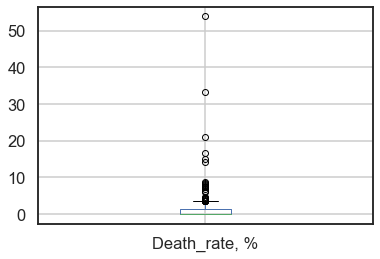

In [20]:
country_prevalence.boxplot(column=['Death_rate, %'])

### Prevalence Over Time In Israel  - Global Data

In [21]:
#create dataset of Israel only
prd_il = prd[prd['Country/Region'] == 'Israel']
#convert date column to date format
prd_il.loc[:,'Last Update'] = pd.to_datetime(prd_il['Last Update'], errors='ignore')
prd_il.loc[:,'Last Update'] = prd_il.loc[:,'Last Update'].dt.date
#remove duplicated date rows
prd_il.sort_values(by=['Last Update'], ascending=False).head(20)
prd_il_cleaned = prd_il.drop_duplicates(subset ='Last Update', keep = 'last') 
#remove row with a mistaken date
prd_il_cleaned = prd_il_cleaned.drop(7690, axis=0)


C:\Users\Leehee\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


C:\Users\Leehee\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


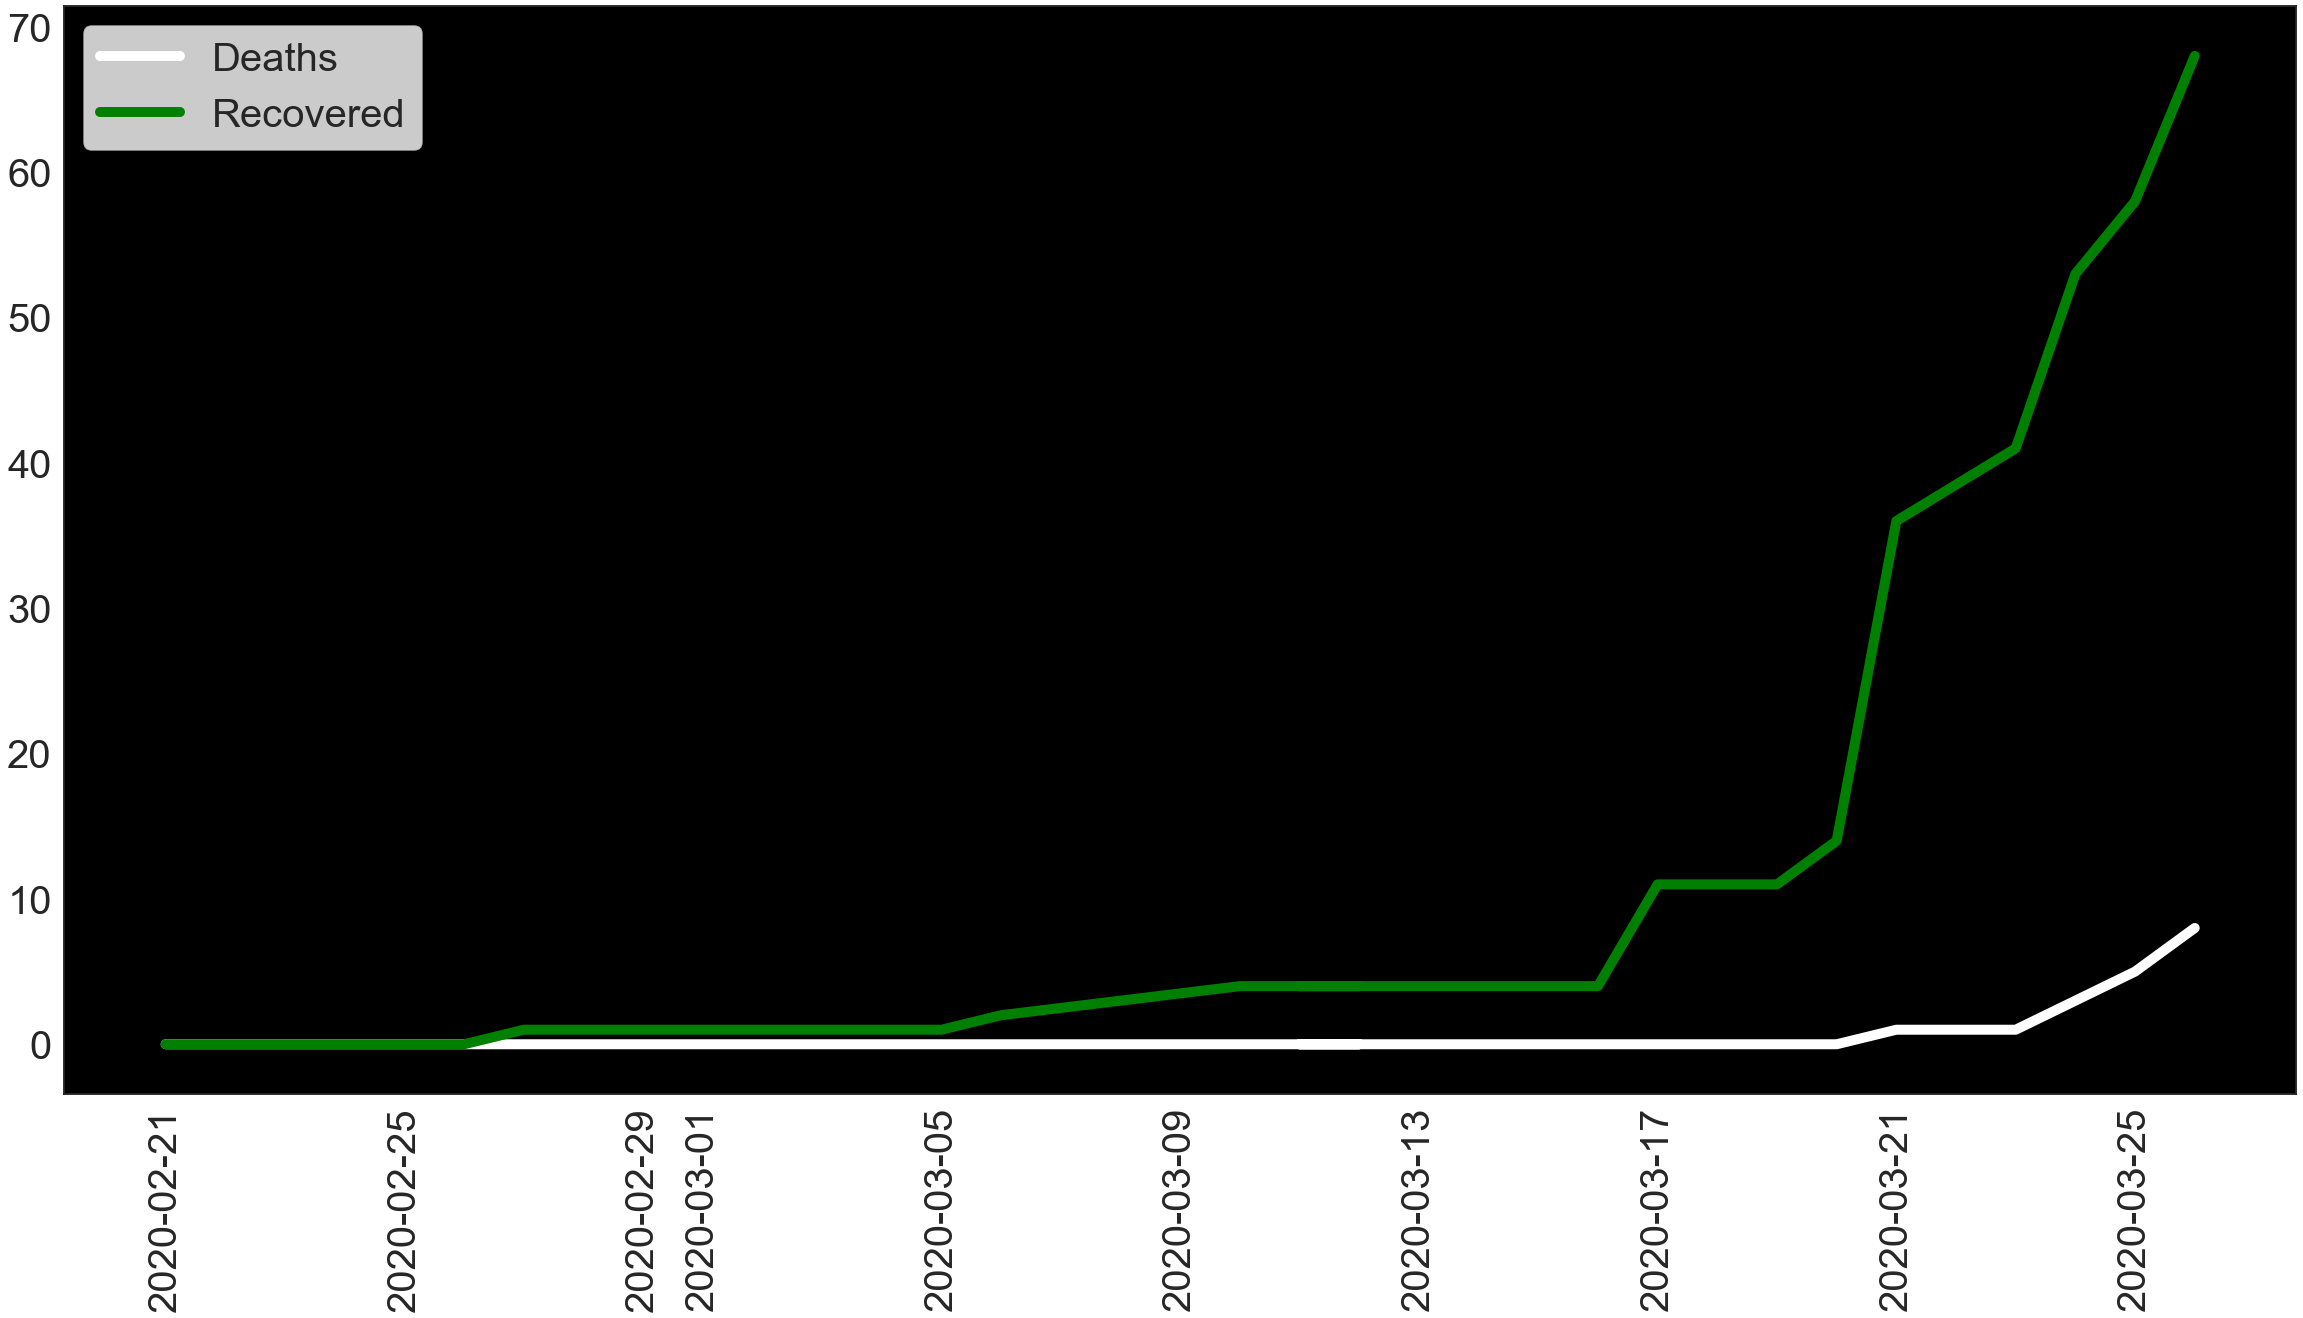

In [22]:
fig = plt.figure(figsize=(40,20))
plt.plot(prd_il_cleaned['Last Update'], prd_il_cleaned['Deaths'], label='Deaths', c='white', linewidth=10)
plt.plot(prd_il_cleaned['Last Update'], prd_il_cleaned['Recovered'], label='Recovered', c='Green', linewidth=10)
plt.legend(loc='upper left', prop={'size': 40})
plt.xticks(rotation = 90, fontsize=40)

plt.yticks(fontsize=40)
ax = plt.axes()
ax.set_facecolor('black')


plt.show()

### Prevalence Over Time In Israel  - Ministry of Health (MOH) Data 
### Updated 20/4/20

In [23]:
moh_data.info()

#rename columns
moh_data.rename(columns={'סך בדיקות לגילוי קורונה': 'total_tests', 'מספר מאומתים': 'confirmed', 'מספר חולים מאושפזים' : 'hospitalized', 'מספר חולים במצב קשה' : 'severe', 'מספר מונשמים': 'ventilated', 'מספר נפטרים': 'deaths', 'תאריך' : 'date' }, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 7 columns):
תאריך                      86 non-null object
סך בדיקות לגילוי קורונה    86 non-null object
מספר מאומתים               86 non-null object
מספר חולים מאושפזים        86 non-null object
מספר חולים במצב קשה        86 non-null object
מספר מונשמים               86 non-null object
מספר נפטרים                86 non-null object
dtypes: object(7)
memory usage: 4.8+ KB


In [24]:
#convert to integers
str_cols = ['total_tests', 'confirmed', 'hospitalized', 'ventilated', 'severe', 'deaths']
moh_data[str_cols] = moh_data[str_cols].replace({'-':0, ',':''}, regex=True)
moh_data[str_cols] = moh_data[str_cols].astype(int)



#create confirmed/total_tests ratio column
moh_data['confirmed/total_tests'] = moh_data['confirmed']/moh_data['total_tests'] * 100
moh_data.tail()


,date,total_tests,confirmed,hospitalized,severe,ventilated,deaths,confirmed/total_tests
81,16-04-20,219618,12981,699,180,134,143,5.910718
82,17-04-20,231182,13283,656,162,123,152,5.745690
83,18-04-20,241813,13594,635,168,113,163,5.621699
84,19-04-20,253099,13884,611,152,113,171,5.485600
85,20-04-20,268239,14187,605,149,118,177,5.288940


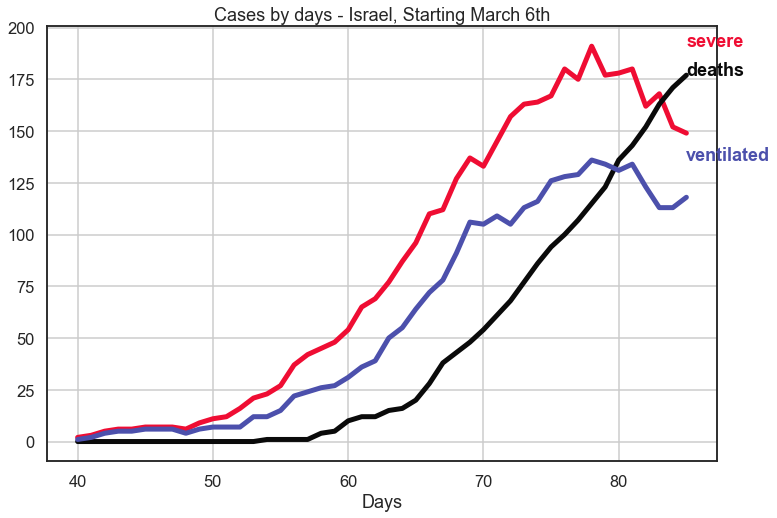

In [25]:
#ploting last 40 days
moh_plot = moh_data[40:]

colors = {'severe':'#EF0D33', 'deaths':'#0A0A0A', 'ventilated':'#4C50AC'}

plot = moh_plot[['severe', 'deaths','ventilated']].plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.set_xlabel('Days')
plot.set_title('Cases by days - Israel, Starting March 6th')
plot.grid(b=None,axis='both')
for condition in list(colors.keys()):
    plot.text(x = moh_plot.index[-1], y = moh_plot[condition].max(), color = colors[condition], s = condition, weight = 'bold')

    


Text(0.5, 1.0, 'Tests, confirmed cases and prevalence ratios by days - Israel, Starting March 6th')

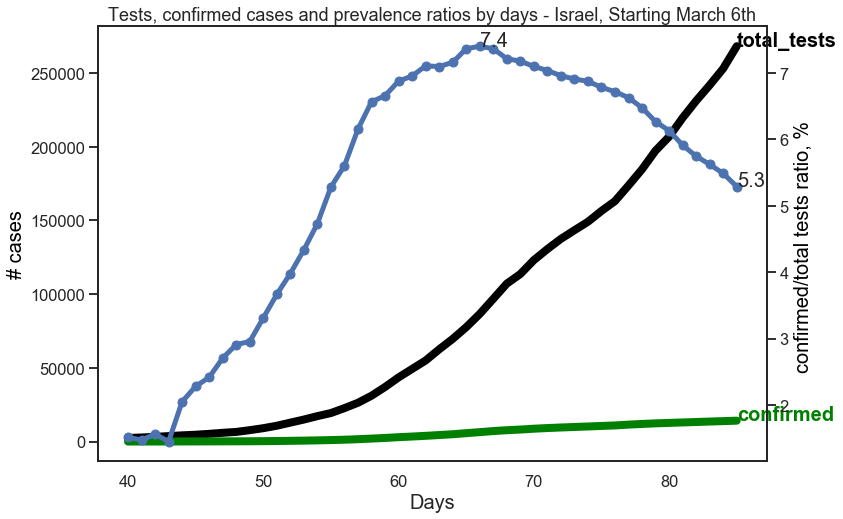

In [34]:
colors = {'confirmed':'green', 'total_tests':'black'}

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(moh_plot['total_tests'] , linewidth=8, color='black')
ax.plot(moh_plot['confirmed'] , linewidth=8, color='green')
ax.set_xlabel("Days",fontsize=20)
ax.set_ylabel("# cases",color="black",fontsize=20)
ax.grid(False)
ax2=ax.twinx()
ax2.plot(moh_plot[['confirmed/total_tests']] ,color="b",marker="o", linewidth=5)
ax2.set_ylabel("confirmed/total tests ratio, % ",color="black",fontsize=20)
ax2.grid(False)


for condition in list(colors.keys()):
    ax.text(x = moh_plot.index[-1], y = moh_plot[condition].max(), color = colors[condition], s = condition, weight = 'bold', fontsize=20)


#ax2.annotate(s=moh_plot['confirmed/total_tests'].values, xycoords = moh_plot['confirmed/total_tests'], xy=(0,0))
max_rate = moh_data['confirmed/total_tests'].idxmax() ,max(moh_plot['confirmed/total_tests'])
last_rate = moh_data['confirmed/total_tests'].index[-1],moh_data['confirmed/total_tests'].iloc[-1]
ax2.annotate(round(max(moh_plot['confirmed/total_tests']),1), max_rate, fontsize=20)
ax2.annotate(round(moh_data['confirmed/total_tests'].iloc[-1],1), last_rate, fontsize=20)

ax.set_title('Tests, confirmed cases and prevalence ratios by days - Israel, Starting March 6th')


